In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from sklearn import datasets

import matplotlib.pyplot as plt

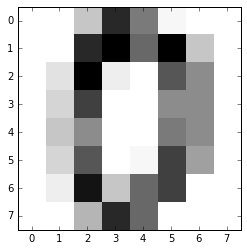

In [2]:
digits = datasets.load_digits()
plt.imshow(digits.images[0], interpolation='nearest', cmap='Greys')

Exception ignored in: <bound method BaseSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x7fd08c15acc0>>
Traceback (most recent call last):
  File "/home/mathewpaul1/.pyenv/versions/3.5.1/envs/py3-workspace/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 140, in __del__
    self.close()
  File "/home/mathewpaul1/.pyenv/versions/3.5.1/envs/py3-workspace/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 905, in close
    self._default_session.__exit__(None, None, None)
  File "/home/mathewpaul1/.pyenv/versions/3.5.1/lib/python3.5/contextlib.py", line 66, in __exit__
    next(self.gen)
  File "/home/mathewpaul1/.pyenv/versions/3.5.1/envs/py3-workspace/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 3215, in get_controller
    assert self.stack[-1] is default
AssertionError: 


154.54104614257812

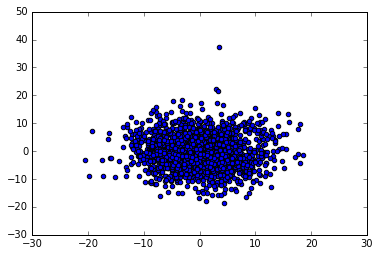

In [14]:
tf.reset_default_graph()

sess = tf.InteractiveSession()#build computational graph

digits.images = digits.images.reshape((-1, 8*8))

inputs = tf.placeholder(tf.float32, digits.images.shape)
W = tf.Variable(tf.truncated_normal([8*8,16]))
mid = tf.matmul(inputs,W)
recon = tf.matmul(mid,tf.transpose(W))

#set up loss and optimiser
loss = tf.reduce_mean((inputs - recon)**2)
train_step = tf.train.GradientDescentOptimizer(0.00001).minimize(loss)

sess.run(tf.initialize_all_variables())

#train
for i in range(10000):
    L,_ = sess.run([loss,train_step],feed_dict = {inputs:digits.images})
    print('\r{}'.format(L), end='')

dim_red = sess.run(mid,feed_dict = {inputs:digits.images})
plt.scatter(dim_red[:,0],dim_red[:,1])

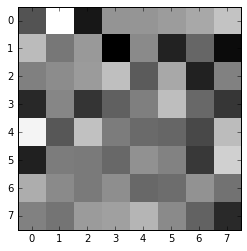

In [15]:
plt.imshow(sess.run(recon, feed_dict={inputs:digits.images})[0].reshape((8,8)), 
           interpolation='nearest',
           cmap='Greys')